# Core Functionality

The `bqapi` functionality presented here presents the most common functionality. 

In [1]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [2]:
%matplotlib inline
import datetime
import bqapi as bp

Create a session object. Settings can be passed to the session object to alter its default behaviour, see the `Settings` class. In this case, simply use the default settings.

In [3]:
sess = bp.Session()

## Reference Data

`get_data` is used to retrieve reference data, being point data or bulk data. 

In [4]:
sess.get_data('ibm us equity','px last')

Field,px last
Security,
ibm us equity,150.72


In [5]:
sess.get_data('ibm us equity',['px last','px open','px high','px low'])

Field,px high,px last,px low,px open
Security,,,,
ibm us equity,151.0,150.72,147.79,150.02


In [6]:
sess.get_data(['ibm us equity','aa us equity','vod ln equity'],['px last','px open'])

Field,px last,px open
Security,,
aa us equity,26.51,26.57
ibm us equity,150.72,150.02
vod ln equity,223.45,225.85


### Field Groups

*Field Groups* are an easy way to use multiple fields at once. To use a field group just enter **g:** before the group name. `ohlc` is the only group defined at this point.

In [7]:
sess.get_data('ibm us equity','g:ohlc')

Field,PX_HIGH,PX_LAST,PX_LOW,PX_OPEN
Security,,,,
ibm us equity,151.0,150.72,147.79,150.02


### Security Lists

You can use *Security Lists* to retrieve multiple securities at once. These are used as **domain:id**. For example, one can retrieve all the constituents from *INDU* index by using **index:indu**. Any field applied will request data for each of the constituents instead of the index itself.

Available domains are:

* **port** *(Portfolio)*
* **eqs** *(Equity Screen)*
* **index** *(Index)*

Multiple Lists can also be requested at once, for example:

```
sess.get_data(['index:indu','eqs:russia','ibm us equity'], 'g:ohlc')
```

Note that you need to own or have access to equity screens. `eqs:russia` would only work if you have previously created this search on `EQS<Go>`. To use a global equity screen, append `:global` to the screen name, e.g. `eqs:Core Capital Ratios:global`.

Portfolios are referenced by the ticker name, e.g. `port:U13647194-1`. In this case, 13647194 is a UUID and 1 is a portfolio number. To use portfolios, they first need to be defined on `PORT<Go>`.

In [8]:
sess.get_data('index:indu',['name','px last'])

Field,name,px last
Security,,
AAPL UW Equity,APPLE INC,117.47
AXP UN Equity,AMERICAN EXPRESS CO,60.08
BA UN Equity,BOEING CO/THE,135.10
CAT UN Equity,CATERPILLAR INC,87.22
CSCO UW Equity,CISCO SYSTEMS INC,30.44
CVX UN Equity,CHEVRON CORP,101.79
DD UN Equity,DU PONT (E.I.) DE NEMOURS,69.50
DIS UN Equity,WALT DISNEY CO/THE,91.17
GE UN Equity,GENERAL ELECTRIC CO,28.98


### Overrides

*Overrides* can be passed to `get_data` in the form of a dictionary. 

```
sess.get_data(security,field,overrides={})
```

**Note:** An easy way to retrieve overrides is by using:

```
sess.get_overrides(field)
sess.get_overrides('pe ratio')
```

will return a list of possible overrides.

In [9]:
ovr = sess.get_overrides('interval avg')
ovr

['EQY_CONSOLIDATED',
 'CRNCY',
 'PERIODICITY_OVERRIDE',
 'END_DATE_OVERRIDE',
 'USE_PREVIOUS_BUSINESS_DAY',
 'MARKET_DATA_OVERRIDE',
 'CALC_INTERVAL',
 'START_DATE_OVERRIDE',
 'BEST_FPERIOD_OVERRIDE',
 'BEST_DATA_SOURCE_OVERRIDE']

In [10]:
sess.get_data('ibm us equity','interval avg', overrides={'CALC_INTERVAL': 'YTD'})

Field,interval avg
Security,
ibm us equity,147.985594


### Bulk Data

Bulk Data can also be retrieved using `get_data`. As shown on previous examples, the session returns a `pandas.DataFrame`. When bulk fields are requested, then the dataframe will have a multi-index.

#### Single Bulk Field

In [11]:
sess.get_data('eur curncy','fwd curve')

Bulk Field          fwd curve                                           \
Field                     Ask       Bid       Mid Security Description   
Security   Bulk Row                                                      
eur curncy 0            0.348     0.302     0.325         EURON Curncy   
           1            0.374     0.340     0.357         EURTN Curncy   
           2            1.159     1.071     1.115         EURSN Curncy   
           3            2.830     2.570     2.700         EUR1W Curncy   
           4           13.370    13.070    13.220         EUR1M Curncy   
           5           26.490    25.990    26.240         EUR2M Curncy   
           6           45.710    45.200    45.455         EUR3M Curncy   
           7           59.170    58.430    58.800         EUR4M Curncy   
           8           72.560    71.650    72.105         EUR5M Curncy   
           9           89.190    88.270    88.730         EUR6M Curncy   
           10         135.950   133.610   134.780         EUR9M Curncy   
           11         185.080   182.640   183.860        EUR12M Curncy   
           12         235.700   230.800   233.250        EUR15M Curncy   
           13         286.500   280.500   283.500        EUR18M Curncy   
           14         393.210   383.610   388.410         EUR2Y Curncy   
           15         610.500   600.500   605.500         EUR3Y Curncy   
           16         846.520   833.480   840.000         EUR4Y Curncy   
           17        1087.940  1064.590  1076.265         EUR5Y Curncy   

Bulk Field                           
Field               Settlement Date  
Security   Bulk Row                  
eur curncy 0             2016-10-20  
           1             2016-10-21  
           2             2016-10-24  
           3             2016-10-28  
           4             2016-11-21  
           5             2016-12-21  
           6             2017-01-23  
           7             2017-02-21  
           8             2017-03-21  
           9             2017-04-21  
           10            2017-07-21  
           11            2017-10-23  
           12            2018-01-22  
           13            2018-04-23  
           14            2018-10-22  
           15            2019-10-21  
           16            2020-10-21  
           17            2021-10-21

#### Multiple Securities - Single Bulk Field

In [12]:
fwd = sess.get_data(['gbp curncy','hkd curncy','eur curncy'],'fwd curve')
fwd

Bulk Field          fwd curve                                           \
Field                     Ask       Bid       Mid Security Description   
Security   Bulk Row                                                      
eur curncy 0            0.348     0.302     0.325         EURON Curncy   
           1            0.374     0.340     0.357         EURTN Curncy   
           2            1.159     1.071     1.115         EURSN Curncy   
           3            2.830     2.570     2.700         EUR1W Curncy   
           4           13.370    13.070    13.220         EUR1M Curncy   
           5           26.490    25.990    26.240         EUR2M Curncy   
           6           45.710    45.200    45.455         EUR3M Curncy   
           7           59.170    58.440    58.805         EUR4M Curncy   
           8           72.560    71.650    72.105         EUR5M Curncy   
           9           89.190    88.270    88.730         EUR6M Curncy   
           10         135.950   133.610   134.780         EUR9M Curncy   
           11         185.080   182.640   183.860        EUR12M Curncy   
           12         235.700   230.800   233.250        EUR15M Curncy   
           13         286.500   280.500   283.500        EUR18M Curncy   
           14         393.210   383.610   388.410         EUR2Y Curncy   
           15         610.500   600.500   605.500         EUR3Y Curncy   
           16         846.520   833.480   840.000         EUR4Y Curncy   
           17        1087.940  1064.590  1076.265         EUR5Y Curncy   
gbp curncy 0            0.194     0.096     0.145         GBPON Curncy   
           1            0.200     0.150     0.175         GBPTN Curncy   
           2            0.607     0.483     0.545         GBPSN Curncy   
           3            1.600     1.020     1.310         GBP1W Curncy   
           4            6.070     5.730     5.900         GBP1M Curncy   
           5           11.710    10.710    11.210         GBP2M Curncy   
           6           23.450    21.460    22.455         GBP3M Curncy   
           7           28.360    27.440    27.900         GBP4M Curncy   
           8           34.480    32.720    33.600         GBP5M Curncy   
           9           43.140    42.070    42.605         GBP6M Curncy   
           10          65.270    63.130    64.200         GBP9M Curncy   
           11          88.790    85.710    87.250        GBP12M Curncy   
           12         113.850   108.150   111.000        GBP15M Curncy   
           13         138.330   131.670   135.000        GBP18M Curncy   
           14         190.260   180.040   185.150         GBP2Y Curncy   
           15         293.530   273.470   283.500         GBP3Y Curncy   
           16         403.040   374.200   388.620         GBP4Y Curncy   
           17         503.010   462.990   483.000         GBP5Y Curncy   
hkd curncy 0           -0.440    -0.960    -0.700         HKDON Curncy   
           1           -0.600    -0.800    -0.700         HKDTN Curncy   
           2           -1.900    -2.500    -2.200         HKDSN Curncy   
           3           -3.450    -7.450    -5.450         HKD1W Curncy   
           4          -22.300   -30.300   -26.300         HKD1M Curncy   
           5          -44.500   -60.500   -52.500         HKD2M Curncy   
           6          -70.790   -85.210   -78.000         HKD3M Curncy   
           7          -92.870  -101.130   -97.000         HKD4M Curncy   
           8         -111.670  -120.330  -116.000         HKD5M Curncy   
           9         -121.680  -146.320  -134.000         HKD6M Curncy   
           10        -135.950  -184.550  -160.250         HKD9M Curncy   
           11        -130.010  -209.990  -170.000        HKD12M Curncy   
           12        -130.420  -202.090  -166.250        HKD15M Curncy   
           13        -130.820  -194.180  -162.500        HKD18M Curncy   
           14        -131.630  -178.370  -155.000         HKD2Y Curncy   
    

The returned data frame can easily be sliced:

In [13]:
fwd.ix['gbp curncy','fwd curve']

Field,Ask,Bid,Mid,Security Description,Settlement Date
Bulk Row,,,,,
0,0.194,0.096,0.145,GBPON Curncy,2016-10-20
1,0.200,0.150,0.175,GBPTN Curncy,2016-10-21
2,0.607,0.483,0.545,GBPSN Curncy,2016-10-24
3,1.600,1.020,1.310,GBP1W Curncy,2016-10-28
4,6.070,5.730,5.900,GBP1M Curncy,2016-11-21
5,11.710,10.710,11.210,GBP2M Curncy,2016-12-21
6,23.450,21.460,22.455,GBP3M Curncy,2017-01-23
7,28.360,27.440,27.900,GBP4M Curncy,2017-02-21
8,34.480,32.720,33.600,GBP5M Curncy,2017-03-21


#### Multiple Securities - Multiple Scalar Fields - Bulk Field

One may want to get a bulk field and combine this with a some scalar values. In this case `get_data` will broadcast the scalar values down the row.

In [14]:
recs = sess.get_data(['ibm us equity','aa us equity'],['best analyst recs bulk','px last','chg pct ytd'])
recs

Bulk Field             best analyst recs bulk              \
Field                           1 Year Return Action Code   
Security      Bulk Row                                      
aa us equity  0                 -2.424536e-14           M   
              1                  0.000000e+00           M   
              2                 -6.260000e+00           M   
              3                  0.000000e+00           M   
              4                  0.000000e+00           M   
              5                  1.058000e+01           M   
              6                  0.000000e+00           M   
              7                 -2.424536e-14           M   
              8                 -2.424536e-14           M   
              9                 -2.424536e-14           M   
              10                 0.000000e+00           M   
              11                -2.424536e-14           M   
              12                -1.345000e+01           M   
              13                -2.424536e-14           M   
              14                -2.424536e-14           M   
              15                -2.424536e-14           M   
              16                 5.720000e+00           D   
              17                -6.260000e+00           M   
ibm us equity 0                 -4.060000e+00           M   
              1                 -8.240000e+00           M   
              2                  1.587000e+01           M   
              3                  0.000000e+00           M   
              4                  0.000000e+00           M   
              5                  4.060000e+00           M   
              6                 -4.060000e+00           M   
              7                  0.000000e+00           M   
              8                  0.000000e+00           M   
              9                  0.000000e+00           M   
              10                 0.000000e+00           M   
              11                 4.060000e+00           M   
              12                 1.194000e+01           M   
              13                 4.060000e+00           M   
              14                 0.000000e+00           M   
              15                -2.424536e-14           M   
              16                 0.000000e+00           M   
              17                -2.424536e-14           M   
              18                -4.060000e+00           M   
              19                 4.060000e+00           M   
              20                 4.060000e+00           M   
              21                 0.000000e+00           M   
              22                 0.000000e+00           M   
              23                -2.424536e-14           M   
              24                 0.000000e+00           M   
              25                 0.000000e+00           M   

Bulk Field                                                             \
Field                                 Analyst        BARR        Date   
Security      Bulk Row                                                  
aa us equity  0               JOSH W SULLIVAN -2147483648  2016-10-19   
              1                DAVID GAGLIANO           5  2016-10-18   
              2                JUSTIN BERGNER           6  2016-10-18   
              3               FRASER PHILLIPS           5  2016-10-15   
              4               DAVID E COLEMAN           5  2016-10-14   
              5                 ANTHONY YOUNG           1  2016-10-12   
              6            ANTHONY RIZZUTO JR           5  2016-10-12   
              7                  EVAN L KURTZ -2147483648  2016-10-11   
              8                  ANDREW QUAIL -2147483648  2016-10-11   
              9                CURT WOODWORTH -2147483648  2016-10-11   
              10        MICHAEL F GAMBARDELLA           5  2016-10-11   
              11               YURIY A VLASOV -2147483648  2016-10-11   
              12                  AND

Same way one can use the `MultiIndex` to slice the data

In [15]:
recs.ix['ibm us equity','best analyst recs bulk'].ix[:,'chg pct ytd'].mean()

9.518969

#### Multiple Bulk Fields - Multiple Scalar Fields

Since the shape of each bulk field can be different, when requesting multiple bulk fields through `get_data` the field with fewer sub-rows will contain NaN values.

In [16]:
multi_bulk = sess.get_data(['ibm us equity','aa us equity'],['best analyst recs bulk','dvd hist all','px last','px open'])
multi_bulk

Bulk Field             best analyst recs bulk              \
Field                           1 Year Return Action Code   
Security      Bulk Row                                      
aa us equity  0                 -2.424536e-14           M   
              1                  0.000000e+00           M   
              2                 -6.260000e+00           M   
              3                  0.000000e+00           M   
              4                  0.000000e+00           M   
              5                  1.058000e+01           M   
              6                  0.000000e+00           M   
              7                 -2.424536e-14           M   
              8                 -2.424536e-14           M   
              9                 -2.424536e-14           M   
              10                 0.000000e+00           M   
              11                -2.424536e-14           M   
              12                -1.345000e+01           M   
              13                -2.424536e-14           M   
              14                -2.424536e-14           M   
              15                -2.424536e-14           M   
              16                 5.720000e+00           D   
              17                -6.260000e+00           M   
              18                          NaN        None   
              19                          NaN        None   
              20                          NaN        None   
              21                          NaN        None   
              22                          NaN        None   
              23                          NaN        None   
              24                          NaN        None   
              25                          NaN        None   
              26                          NaN        None   
              27                          NaN        None   
              28                          NaN        None   
              29                          NaN        None   
...                                       ...         ...   
ibm us equity 132                         NaN        None   
              133                         NaN        None   
              134                         NaN        None   
              135                         NaN        None   
              136                         NaN        None   
              137                         NaN        None   
              138                         NaN        None   
              139                         NaN        None   
              140                         NaN        None   
              141                         NaN        None   
              142                         NaN        None   
              143                         NaN        None   
              144                         NaN        None   
              145                         NaN        None   
              146                         NaN        None   
              147                         NaN        None   
              148                         NaN        None   
              149                         NaN        None   
              150                         NaN        None   
              151                         NaN        None   
              152                         NaN        None   
              153                         NaN        None   
              154                         NaN        None   
              155                         NaN        None   
              156                         NaN        None   
              157                         NaN        None   
              158                         NaN        None   
              159                         NaN        None   
              160                         NaN        None   
              161                         NaN        None   

Bulk Field                                                               \
Field               

One can still access each bulk field as a separate dataframe:

In [17]:
multi_bulk.ix['ibm us equity','best analyst recs bulk'].dropna()

Field,1 Year Return,Action Code,Analyst,BARR,Date,Firm Name,Period,Rating,Recommendation,Target Price,px last,px open
Bulk Row,,,,,,,,,,,,
0,-4.060000e+00,M,JAMES KISNER,5.000000e+00,2016-10-19,Jefferies,12 month,1.0,underperform,1.250000e+02,150.72,150.02
1,-8.240000e+00,M,RICHARD NGUYEN,6.000000e+00,2016-10-18,Societe Generale,12 month,3.0,hold,1.600000e+02,150.72,150.02
2,1.587000e+01,M,KATHRYN HUBERTY,1.000000e+00,2016-10-18,Morgan Stanley,12 month,5.0,Overwt/Cautious,1.790000e+02,150.72,150.02
3,0.000000e+00,M,JAMES SCHNEIDER,4.000000e+00,2016-10-18,Goldman Sachs,12 month,3.0,neutral/neutral,1.450000e+02,150.72,150.02
4,0.000000e+00,M,AMIT DARYANANI,4.000000e+00,2016-10-18,RBC Capital Markets,12 month,3.0,sector perform,1.650000e+02,150.72,150.02
5,4.060000e+00,M,JAMES KELLEHER,3.000000e+00,2016-10-18,Argus Research Corp,12 month,5.0,buy,1.750000e+02,150.72,150.02
6,-4.060000e+00,M,KULBINDER GARCHA,5.000000e+00,2016-10-18,Credit Suisse,Not Provided,1.0,underperform,1.100000e+02,150.72,150.02
7,0.000000e+00,M,TIEN-TSIN HUANG,4.000000e+00,2016-10-18,J.P. Morgan,18 month,3.0,neutral,1.730000e+02,150.72,150.02
8,0.000000e+00,M,TONI SACCONAGHI,4.000000e+00,2016-10-18,Bernstein,12 month,3.0,market perform,1.400000e+02,150.72,150.02


#### Custom index

Any column of a bulk field can be specified to be used as an index:

In [25]:
sess.get_data('gbp curncy', 'fwd curve', index='Settlement Date')

Bulk Field      fwd curve                                          \
Field                 Ask      Bid Bulk Row       Mid    Security   
Settlement Date                                                     
2016-10-20          0.194    0.096        0    0.1450  gbp curncy   
2016-10-21          0.203    0.152        1    0.1775  gbp curncy   
2016-10-24          0.607    0.483        2    0.5450  gbp curncy   
2016-10-28          1.610    1.000        3    1.3050  gbp curncy   
2016-11-21          6.030    5.760        4    5.8950  gbp curncy   
2016-12-21         11.370   10.800        5   11.0850  gbp curncy   
2017-01-23         23.390   21.520        6   22.4550  gbp curncy   
2017-02-21         28.080   27.080        7   27.5800  gbp curncy   
2017-03-21         34.900   32.530        8   33.7150  gbp curncy   
2017-04-21         43.110   42.040        9   42.5750  gbp curncy   
2017-07-21         65.390   63.010       10   64.2000  gbp curncy   
2017-10-23         88.100   84.660       11   86.3800  gbp curncy   
2018-01-22        113.850  108.150       12  111.0000  gbp curncy   
2018-04-23        139.080  132.420       13  135.7500  gbp curncy   
2018-10-22        190.170  179.980       14  185.0750  gbp curncy   
2019-10-21        291.510  273.490       15  282.5000  gbp curncy   
2020-10-21        398.740  370.260       16  384.5000  gbp curncy   
2021-10-21        505.010  464.990       17  485.0000  gbp curncy   

Bulk Field                            
Field           Security Description  
Settlement Date                       
2016-10-20              GBPON Curncy  
2016-10-21              GBPTN Curncy  
2016-10-24              GBPSN Curncy  
2016-10-28              GBP1W Curncy  
2016-11-21              GBP1M Curncy  
2016-12-21              GBP2M Curncy  
2017-01-23              GBP3M Curncy  
2017-02-21              GBP4M Curncy  
2017-03-21              GBP5M Curncy  
2017-04-21              GBP6M Curncy  
2017-07-21              GBP9M Curncy  
2017-10-23             GBP12M Curncy  
2018-01-22             GBP15M Curncy  
2018-04-23             GBP18M Curncy  
2018-10-22              GBP2Y Curncy  
2019-10-21              GBP3Y Curncy  
2020-10-21              GBP4Y Curncy  
2021-10-21              GBP5Y Curncy

### Historical Data

Historical Data can be retrieved with `get_historical_data()`.

`start_date` and `end_date` can be either `datetime` instances, `date` instances or strings in all formats supported by the `dateutil` module, such as *YYYYMMDD*, *YYYY-MM-DD* or *MM/DD/YY*.

In [26]:
sess.get_historical_data('ibm us equity','px last',periodicity='MONTHLY')

Field                     px last
Security      date               
ibm us equity 2015-10-30   140.08
              2015-11-30   139.42
              2015-12-31   137.62
              2016-01-29   124.79
              2016-02-29   131.03
              2016-03-31   151.45
              2016-04-29   145.94
              2016-05-31   153.74
              2016-06-30   151.78
              2016-07-29   160.62
              2016-08-31   158.88
              2016-09-30   158.85

Multi-security/Multi-Field requests are also possible:

In [27]:
h=sess.get_historical_data(['ibm us equity','aa us equity'],['px last','px open'])

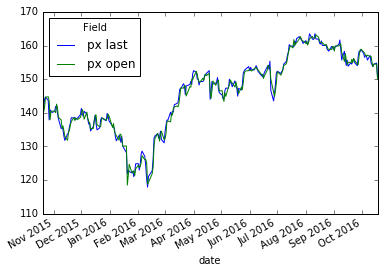

In [28]:
h.ix['ibm us equity'].plot()

In [29]:
tech=sess.get_historical_data(['msft us equity','aapl us equity'],'px last', format=bp.data_frame('date', 'Security'))
tech.head()

Security,aapl us equity,msft us equity
Field,px last,px last
date,,
2015-10-20,113.77,47.77
2015-10-21,113.76,47.20
2015-10-22,115.50,48.03
2015-10-23,119.08,52.87
2015-10-26,115.28,54.25


We can use `Pandas` functionality to perform a `Series` normalization and compare the performance of the two securities:

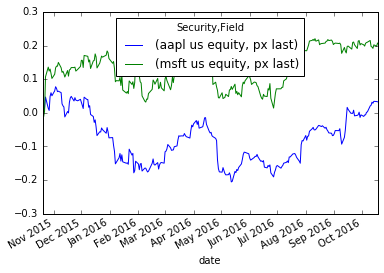

In [30]:
(tech/tech.ix[0]-1).plot()

Historical data requests also support field groups.

In [31]:
sess.get_historical_data('ibm us equity','g:ohlc', start_date='2014-01-01', end_date='2015-01-01').head()

Field                      PX_HIGH  PX_LAST  PX_LOW  PX_OPEN
Security      date                                          
ibm us equity 2014-01-02  187.4000   185.53  185.20   187.21
              2014-01-03  187.3500   186.64  185.30   185.83
              2014-01-06  187.3550   186.00  185.30   187.15
              2014-01-07  190.3500   189.71  186.38   186.39
              2014-01-08  189.4175   187.97  187.26   189.33

Data requests and `Pandas` functionality can be chained. For example the below will produce a correlation matrix of the Dow Jones Index.

In [32]:
corr=sess.get_historical_data('index:indu','px last', start_date='2014-01-01', end_date='2015-01-01',
                              format=bp.data_frame('date', 'Security')).pct_change().corr()
corr.ix[0:5,0:5]

,Security,AAPL UW Equity,AXP UN Equity,BA UN Equity,CAT UN Equity,CSCO UW Equity
,Field,px last,px last,px last,px last,px last
Security,Field,,,,,
AAPL UW Equity,px last,1.000000,0.304267,0.255314,0.269309,0.262330
AXP UN Equity,px last,0.304267,1.000000,0.512544,0.410508,0.488629
BA UN Equity,px last,0.255314,0.512544,1.000000,0.405132,0.354720
CAT UN Equity,px last,0.269309,0.410508,0.405132,1.000000,0.368821
CSCO UW Equity,px last,0.262330,0.488629,0.354720,0.368821,1.000000


### Intraday Bar Data

Bar Data can be retrieved using `get_intraday_bar_data`. Here we retrieve bar data in 1-hour intervals for the last 7 days:

In [33]:
bar=sess.get_intraday_bar_data('ibm us equity', event_type='TRADE', bar_interval=60,
                               start_datetime=datetime.datetime.now() - datetime.timedelta(days=7))

In [34]:
bar.head()

Field,close,high,low,numEvents,open,value,volume
time,,,,,,,
2016-10-12 13:05:31+00:00,154.18,154.97,153.08,3368,154.97,77742608.0,505348
2016-10-12 14:05:31+00:00,154.02,154.32,153.55,3226,154.18,61048332.0,396377
2016-10-12 15:05:31+00:00,154.58,154.89,154.01,2386,154.03,47273656.0,306064
2016-10-12 16:05:31+00:00,154.36,154.68,154.30,1407,154.59,26657064.0,172551
2016-10-12 17:05:31+00:00,154.45,154.68,154.24,1474,154.36,28558956.0,184966


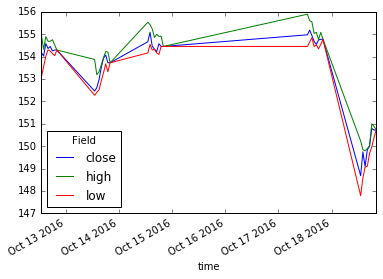

In [35]:
bar[['close','high','low']].plot()

### Intraday Tick Data

Get intraday tick data for the last trading day:

In [36]:
yesterday = datetime.date.today() - datetime.timedelta(days=1)
bas = sess.get_intraday_tick_data('san sm equity', 'TRADE', include_broker_codes=True,
                                  start_datetime=datetime.datetime.combine(yesterday, datetime.time(0, 0)),
                                  end_datetime=datetime.datetime.combine(yesterday, datetime.time(23, 59)))

# No data? Probably was not a trading day. Try the previous day:
while bas.empty or sum(bas['size']) == 0:
    yesterday -= datetime.timedelta(days=1)
    bas = sess.get_intraday_tick_data('san sm equity', 'TRADE', include_broker_codes=True,
                                      start_datetime=datetime.datetime.combine(yesterday, datetime.time(0, 0)),
                                      end_datetime=datetime.datetime.combine(yesterday, datetime.time(23, 59)))

bas.head()

Field,brokerBuyCode,brokerSellCode,size,type,value
time,,,,,
2016-10-18 07:00:16+00:00,ANON,ANON,2,TRADE,4.04
2016-10-18 07:00:16+00:00,ANON,ANON,248,TRADE,4.04
2016-10-18 07:00:16+00:00,ANON,ANON,300,TRADE,4.04
2016-10-18 07:00:16+00:00,ANON,ANON,1,TRADE,4.04
2016-10-18 07:00:16+00:00,ANON,ANON,19,TRADE,4.04


Top 10 Brokers by Size for Santander in the last day

In [37]:
bas.groupby('brokerBuyCode').sum().sort_values('size',ascending=False).ix[0:10]

Field,size,value
brokerBuyCode,,
ANON,52375840,58716.646
CITM,1158450,3963.866
CABZ,73161,32.589
SLTS,41093,53.107
MRBC,26435,32.704
DBKM,16905,28.649
LNK4,15000,16.160
BINM,11708,16.289
LNKM,3000,4.081


### Security Chains

A chain is derived from a set of underlying tickers. These can be index members, option chain, bond chain etc. When generating a chain then all further calls are requested for the chain tickers, and not the underlying tickers.

Chains can be requested using **chain**

    chain(securities, field, overrides, path, suffix)

In all cases the `field` used will produce a chain (bulk field) for the `securities` stated. 
`path` refers to the column that holds the chain tickers. The most common paths are available as default settings already.

`suffix` refers to the yellow key that needs to be appended to the to chain tickers column. Again, for the common fields this can be omitted since proper default values are taken already.

In [38]:
chain=sess.chain('vod ln equity','bond chain')
vod=sess.get_data(chain, ['amt outstanding','crncy'])
vod

Field,amt outstanding,crncy
Security,,
EC225416 Corp,5.600000e+06,USD
EC225480 Corp,5.600000e+06,USD
EC326613 Corp,7.444000e+08,USD
EC765722 Corp,4.950000e+08,USD
EC766795 Corp,4.500000e+08,GBP
EC995935 Corp,7.500000e+08,EUR
ED029166 Corp,5.000000e+08,USD
ED242631 Corp,2.499980e+08,GBP
EG212190 Corp,1.300000e+09,USD


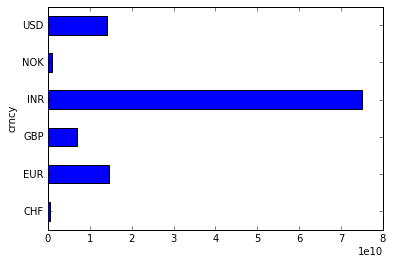

In [39]:
vod.groupby('crncy').sum()['amt outstanding'].plot(kind='barh')

Option chain

In [40]:
sess.get_data(sess.chain(['ibm us equity','indu index'],'chain tickers',{'chain points ovrd':10}),
              'opt implied volatility mid')

Field,opt implied volatility mid
Security,
DJX US 10/21/16 C191 Equity,27.74986
DJX US 10/21/16 C192 Equity,30.17376
DJX US 10/21/16 C193 Equity,32.56301
DJX US 10/21/16 C194 Equity,34.91577
DJX US 10/21/16 C195 Equity,37.23677
DJX US 10/21/16 C196 Equity,39.52865
DJX US 10/21/16 C197 Equity,41.77864
DJX US 10/21/16 C198 Equity,44.01068
DJX US 10/21/16 C199 Equity,46.22308


To the extent possible under law, Bloomberg L.P. has waived all copyright and related or neighboring rights to this notebook, in accordance with the Creative Commons CC0 1.0 Public Domain Dedication ([http://creativecommons.org/publicdomain/zero/1.0/](http://creativecommons.org/publicdomain/zero/1.0/)).